In [35]:
import os
import collections
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sn


prior_prob={}

cond_prob0 = {}        #0 denotes ham
cond_prob1=  {}        #1 denotes spam
word_freq0 = {}
word_freq1 = {}


i =0
j =0
for docs in os.listdir('ham-train'):
    doc = open('ham-train' + '//' + docs,errors = 'ignore')
    word_freq0.update(collections.Counter(doc.read().split(" ")))   #dictionary with frequncy of each word in ham train         
   
    
    i+=1
    
    
for docs in os.listdir('spam-train'):
    doc = open('spam-train' + '//' + docs,errors = 'ignore')
    word_freq1.update(collections.Counter(doc.read().split(" ")))  #dictionary with frequncy of each word in spam - train      
                                     
   
    j+=1   
    
        
data_size = len(word_freq0)+len(word_freq1)   
data_size

242584

In [36]:
prior_prob['ham'] = i/(i+j)          
prior_prob['spam'] = j/(j+i)

print(prior_prob)             #prior probs for ham and spam

{'ham': 0.5520148863173809, 'spam': 0.44798511368261906}


In [37]:
for word in word_freq0.items():
    cond_prob0[word[0]] = (word[1]+1)/(sum(word_freq0.values())+data_size) #condprob for ham



for word in word_freq1.items():
    cond_prob1[word[0]] = (word[1]+1)/(sum(word_freq1.values())+data_size) #condprob for spam
print(len(cond_prob1),len(cond_prob0))    
    
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0



110865 131719


In [38]:
for docs in os.listdir('spam'):                  #testing for spam
    doc = open('spam' + '//' + docs,errors = 'ignore')
    word_freqT1 = collections.Counter(doc.read().split(" "))
    spam_score = 0
    ham_score = 0
    spam_score += (np.log(prior_prob['spam']))
    ham_score += (np.log(prior_prob['ham']))
    
    
    for word in word_freqT1.items():
        if (word[0] in cond_prob0) and (word[0] in cond_prob1):
            
            spam_score += (np.log(cond_prob1[word[0]]))
            ham_score  += (np.log(cond_prob0[word[0]]))
            
        elif (word[0] in cond_prob0) and (word[0] not in cond_prob1):
            ham_score  += abs(np.log(cond_prob0[word[0]]))
            
        elif (word[0] in cond_prob1) and (word[0] not in cond_prob0):
            spam_score += abs(np.log(cond_prob1[word[0]]))
            
            
            
           
    if spam_score>ham_score:
        true_positive  +=1   
    else:
        false_negative+=1
        
        
        
       


In [39]:
for docs in os.listdir('ham'):            #testing for ham
    doc = open('ham' + '//' + docs,errors = 'ignore')
    word_freqT0 = collections.Counter(doc.read().split(" "))
    spam_score = 0
    ham_score = 0
    spam_score += (np.log(prior_prob['spam']))
    ham_score += (np.log(prior_prob['ham']))
    
    
    for word in word_freqT0.items():
        if (word[0] in cond_prob0) and (word[0] in cond_prob1):
            spam_score +=( np.log(cond_prob1[word[0]])*word[1])
            ham_score += (np.log(cond_prob0[word[0]])*word[1])
        elif (word[0] in cond_prob0) and (word[0] not in cond_prob1):
            ham_score  += abs(np.log(cond_prob0[word[0]]))
        elif (word[0] in cond_prob1) and (word[0] not in cond_prob0):
            spam_score += abs(np.log(cond_prob1[word[0]]))    
            
            
       
    if spam_score>ham_score:
        false_positive +=1
    else:
        true_negative +=1   
        

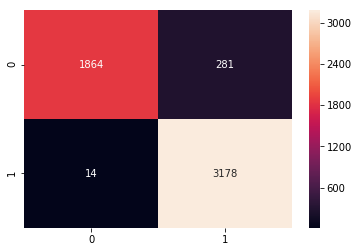

In [40]:
cf = [[true_negative,false_negative],[false_positive,true_positive]]
sn.heatmap(cf,annot = True,fmt = "d") #formatting confusion matrix to integers type

In [41]:
accuracy = (true_negative+true_positive)/(true_positive+true_negative+false_positive+false_negative)  
print((accuracy*100) )

94.47255012179127
